In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pyscipopt
import pickle
from pyscipopt import Model
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from data_loader import *
from utils import *
from bandit_utils import *

from enviornment import Enviornment
from reward import Reward
from lin_ucb import LinUCB

## Linear UCB on 1 minutes MIP instances

In [11]:
time_limit_in_mins = 1

In [12]:
actions = [{'veclendiving' : -1}, {'veclendiving' : 1}, {'veclendiving' : 10}]
action_values = list(map(lambda x: list(x.values())[0], actions))

seeds = [0,1,2,3,4]
priority_or_freq = 'freq'
min_time_to_solve = 0
max_rows = 100000
max_cols = 100000

max_primal_integral = time_limit_in_mins * 60 # set to no primal bound found in time limit
reward_path_prefix = '../solved_mip_results/rewards_' + str(time_limit_in_mins) +'_min/'

# dimension of state
state_dim = 5

In [13]:
# training parameters
episodes = 1000
n_runs = 10
seed = 1234

# bandit parameters
alpha = 0.5

# init bandit
bandit = LinUCB(action_values, state_dim, alpha)

In [14]:
# load instances
instances = get_instances(actions = actions, 
                          seeds = seeds, 
                          priority_or_freq = priority_or_freq, 
                          max_primal_integral = max_primal_integral,
                          min_time_to_solve = min_time_to_solve,
                          max_rows = max_rows,
                          max_cols = max_cols,
                          reward_path_prefix = reward_path_prefix)

In [15]:
# get train/test split
train_instances, test_instances = get_train_test_split(instances, seed=seed)

print('Number of train instances:', len(train_instances))
print('Number of test instances:', len(test_instances))

Number of train instances: 239
Number of test instances: 60


In [16]:
# get scaler for training inputs
scaler = get_scaler_normalize_train_states(train_instances)

In [17]:
# init arrays to store results
train_rewards = []
train_actions = []
test_rewards = []
test_actions = []


for run in range(n_runs):
    
    print('Run:', run+1)
    np.random.seed(seed + run)
    
    train_rewards_ep = []
    train_actions_ep = []

    test_rewards_ep = []
    test_actions_ep = []

    for episode in range(episodes):
        
        if (episode + 1) % 100 == 0:
            print('  episode:', episode + 1)

        instance, state = get_random_instance(train_instances)

        state = scaler.transform(state.reshape(1,state_dim)).reshape(state_dim,)
        action = bandit.get_action(state)

        reward = take_action_on_instance(instance, action, reward_path_prefix = reward_path_prefix)

        bandit.update_params(reward, state, action)

        train_reward, _ = eval_on_all(bandit, train_instances, reward_path_prefix=reward_path_prefix)
        test_reward, _ = eval_on_all(bandit, test_instances, reward_path_prefix=reward_path_prefix)

        train_rewards_ep.append(train_reward)
        #train_actions.append(train_action)
        test_rewards_ep.append(test_reward)
        #test_actions.append(test_action)
        
    train_rewards.append(train_rewards_ep)
    test_rewards.append(test_rewards_ep)

Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10


In [18]:
# get mean results for train and test
train_rewards_mean = np.mean(train_rewards, axis=0)
test_rewards_mean = np.mean(test_rewards, axis=0)

# get optimal rewards for train and test
train_opt = compute_optimal_action_reward(train_instances, action_values, reward_path_prefix=reward_path_prefix)
test_opt = compute_optimal_action_reward(test_instances, action_values, reward_path_prefix=reward_path_prefix)

# get scip default rewards for train and test
train_scip_reward = compute_scip_action_reward(train_instances, reward_path_prefix=reward_path_prefix)
test_scip_reward = compute_scip_action_reward(test_instances, reward_path_prefix=reward_path_prefix)

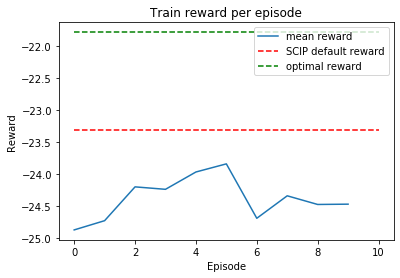

In [25]:
# plot train rewards
plt.plot(train_rewards_mean, label = 'mean reward')
plt.hlines(train_scip_reward, 0, episodes, linestyles='dashed', colors=['r'], label='SCIP default reward')
plt.hlines(train_opt, 0, episodes, linestyles='dashed', colors=['g'], label='optimal reward')

plt.legend()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Train reward per episode')

plt.show()

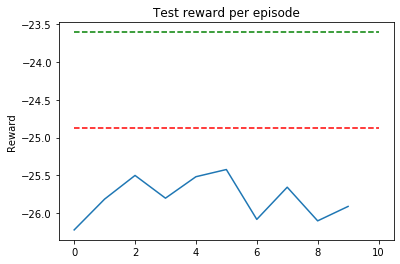

In [26]:
# plot test rewards
plt.plot(test_rewards_mean, label = 'mean reward')
plt.hlines(test_scip_reward, 0, episodes, linestyles='dashed', colors=['r'], label='SCIP default reward')
plt.hlines(test_opt, 0, episodes, linestyles='dashed', colors=['g'], label='optimal reward')

plt.ylabel('Reward')
plt.title('Test reward per episode')

plt.show()

## Linear UCB on 5 minutes MIP instances

In [27]:
time_limit_in_mins = 5

In [28]:
actions = [{'veclendiving' : -1}, {'veclendiving' : 1}, {'veclendiving' : 10}]
action_values = list(map(lambda x: list(x.values())[0], actions))

seeds = [0,1,2,3,4]
priority_or_freq = 'freq'
min_time_to_solve = 0
max_rows = 100000
max_cols = 100000

max_primal_integral = time_limit_in_mins * 60 # set to no primal bound found in time limit
reward_path_prefix = '../solved_mip_results/rewards_' + str(time_limit_in_mins) +'_min/'

# dimension of state
state_dim = 5

In [29]:
# training parameters
episodes = 1000
n_runs = 10
seed = 1234

# bandit parameters
alpha = 0.5

# init bandit
bandit = LinUCB(action_values, state_dim, alpha)

In [30]:
# load instances
instances = get_instances(actions = actions, 
                          seeds = seeds, 
                          priority_or_freq = priority_or_freq, 
                          max_primal_integral = max_primal_integral,
                          min_time_to_solve = min_time_to_solve,
                          max_rows = max_rows,
                          max_cols = max_cols,
                          reward_path_prefix = reward_path_prefix)

In [31]:
# get train/test split
train_instances, test_instances = get_train_test_split(instances, seed=seed)

print('Number of train instances:', len(train_instances))
print('Number of test instances:', len(test_instances))

Number of train instances: 273
Number of test instances: 69


In [32]:
# get scaler for training inputs
scaler = get_scaler_normalize_train_states(train_instances)

In [33]:
# init arrays to store results
train_rewards = []
train_actions = []
test_rewards = []
test_actions = []


for run in range(n_runs):
    
    print('Run:', run+1)
    np.random.seed(seed + run)
    
    train_rewards_ep = []
    train_actions_ep = []

    test_rewards_ep = []
    test_actions_ep = []

    for episode in range(episodes):
        
        if (episode + 1) % 100 == 0:
            print('  episode:', episode + 1)

        instance, state = get_random_instance(train_instances)

        state = scaler.transform(state.reshape(1,state_dim)).reshape(state_dim,)
        action = bandit.get_action(state)

        reward = take_action_on_instance(instance, action, reward_path_prefix = reward_path_prefix)

        bandit.update_params(reward, state, action)

        train_reward, _ = eval_on_all(bandit, train_instances, reward_path_prefix=reward_path_prefix)
        test_reward, _ = eval_on_all(bandit, test_instances, reward_path_prefix=reward_path_prefix)

        train_rewards_ep.append(train_reward)
        #train_actions.append(train_action)
        test_rewards_ep.append(test_reward)
        #test_actions.append(test_action)
        
    train_rewards.append(train_rewards_ep)
    test_rewards.append(test_rewards_ep)

Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10


In [34]:
# get mean results for train and test
train_rewards_mean = np.mean(train_rewards, axis=0)
test_rewards_mean = np.mean(test_rewards, axis=0)

# get optimal rewards for train and test
train_opt = compute_optimal_action_reward(train_instances, action_values, reward_path_prefix=reward_path_prefix)
test_opt = compute_optimal_action_reward(test_instances, action_values, reward_path_prefix=reward_path_prefix)

# get scip default rewards for train and test
train_scip_reward = compute_scip_action_reward(train_instances, reward_path_prefix=reward_path_prefix)
test_scip_reward = compute_scip_action_reward(test_instances, reward_path_prefix=reward_path_prefix)

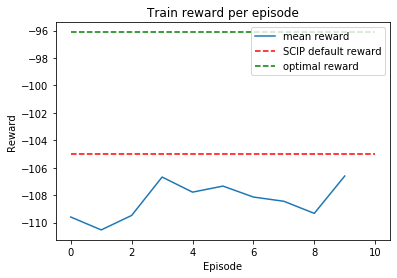

In [35]:
# plot train rewards
plt.plot(train_rewards_mean, label = 'mean reward')
plt.hlines(train_scip_reward, 0, episodes, linestyles='dashed', colors=['r'], label='SCIP default reward')
plt.hlines(train_opt, 0, episodes, linestyles='dashed', colors=['g'], label='optimal reward')

plt.legend()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Train reward per episode')

plt.show()

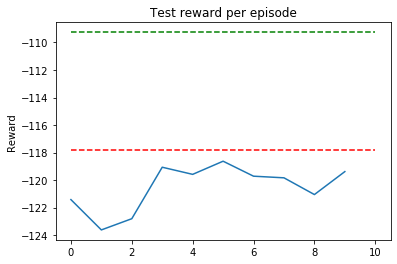

In [36]:
# plot test rewards
plt.plot(test_rewards_mean, label = 'mean reward')
plt.hlines(test_scip_reward, 0, episodes, linestyles='dashed', colors=['r'], label='SCIP default reward')
plt.hlines(test_opt, 0, episodes, linestyles='dashed', colors=['g'], label='optimal reward')

plt.ylabel('Reward')
plt.title('Test reward per episode')

plt.show()